Using Rob Mulla's guide ... https://www.youtube.com/watch?v=xi0vhXFPegw

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns : 200

In [338]:
df = pd.read_csv("train.csv")

# Understanding the data

In [339]:
df.shape

(891, 12)

In [340]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [341]:
print(df.columns, df.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [342]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preparing the data

## Dropping unwanted columns

In [343]:
df = df[[#'PassengerId', 
    'Survived', 'Pclass', 
    #'Name', 
    'Sex', 'Age', 'SibSp','Parch',
    #'Ticket', 
    'Fare', 
    #'Cabin', 'Embarked'
   ]].copy()

In [344]:
df.shape

(891, 7)

In [345]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

## Renaming columns

In [346]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [347]:
df = df.rename(columns={'Survived': 'y', 
                   'Pclass' : 'Class',
                   'Parch': 'ParCh'})

In [348]:
df.head()

,y,Class,Sex,Age,SibSp,ParCh,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Identifying missing data

In [349]:
df.isna().sum()

y          0
Class      0
Sex        0
Age      177
SibSp      0
ParCh      0
Fare       0
dtype: int64

Will impute with Miss Forest or use a Random Forest model

## Identifying duplicates

In [350]:
df.duplicated().sum()

114

In [351]:
df.loc[df.duplicated()] 

,y,Class,Sex,Age,SibSp,ParCh,Fare
42,0,3,male,NaN,0,0,7.8958
47,1,3,female,NaN,0,0,7.7500
76,0,3,male,NaN,0,0,7.8958
77,0,3,male,NaN,0,0,8.0500
87,0,3,male,NaN,0,0,8.0500
...,...,...,...,...,...,...,...
877,0,3,male,19.0,0,0,7.8958
878,0,3,male,NaN,0,0,7.8958
881,0,3,male,33.0,0,0,7.8958
884,0,3,male,25.0,0,0,7.0500


In [352]:
# df = df.drop_duplicates(keep='first') \
#     .reset_index() \
#     .copy()

I'm going to retain all duplicates as they're likely to be reflected in the test data. Further, I have seen that some are the result of NaN values for age which could imputed using Miss Forest.

In [353]:
df.query('Fare == 0') #assume this is all staff in df

,y,Class,Sex,Age,SibSp,ParCh,Fare
179,0,3,male,36.0,0,0,0.0
263,0,1,male,40.0,0,0,0.0
271,1,3,male,25.0,0,0,0.0
277,0,2,male,NaN,0,0,0.0
302,0,3,male,19.0,0,0,0.0
413,0,2,male,NaN,0,0,0.0
466,0,2,male,NaN,0,0,0.0
481,0,2,male,NaN,0,0,0.0
597,0,3,male,49.0,0,0,0.0
633,0,1,male,NaN,0,0,0.0


# Changing data types

In [354]:
df.columns

Index(['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare'], dtype='object')

In [355]:
df = df.astype({'y': 'category', 'Class': 'category', 'Sex': 'category'}).copy()

In [356]:
df.dtypes

y        category
Class    category
Sex      category
Age       float64
SibSp       int64
ParCh       int64
Fare      float64
dtype: object

# Univariate analysis

In [357]:
df.columns

Index(['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare'], dtype='object')

In [358]:
col = ['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare']

## Value counts

In [359]:
def val_counts(x):
    for v in x:
        print(f"\n{df[v].value_counts()}\n")

In [360]:
val_counts(col)


0    549
1    342
Name: y, dtype: int64


3    491
1    216
2    184
Name: Class, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: ParCh, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64



In [361]:
def vis_val_counts(col):
    #sort columns into categorical for count and continuous for hist
    cat = []
    con = []
    for i in col:
        if df[i].dtype == 'category':
            cat.append(i)
        else:
            con.append(i)
    for i in cat:
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.countplot(y = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Blues_r')
    for i in con:
        fig, ax = plt.subplots(1,1, figsize=(15, 6), layout='constrained')
        sns.histplot(x=df[i][1:],data=df,stat='count', fill='True', element='bars')

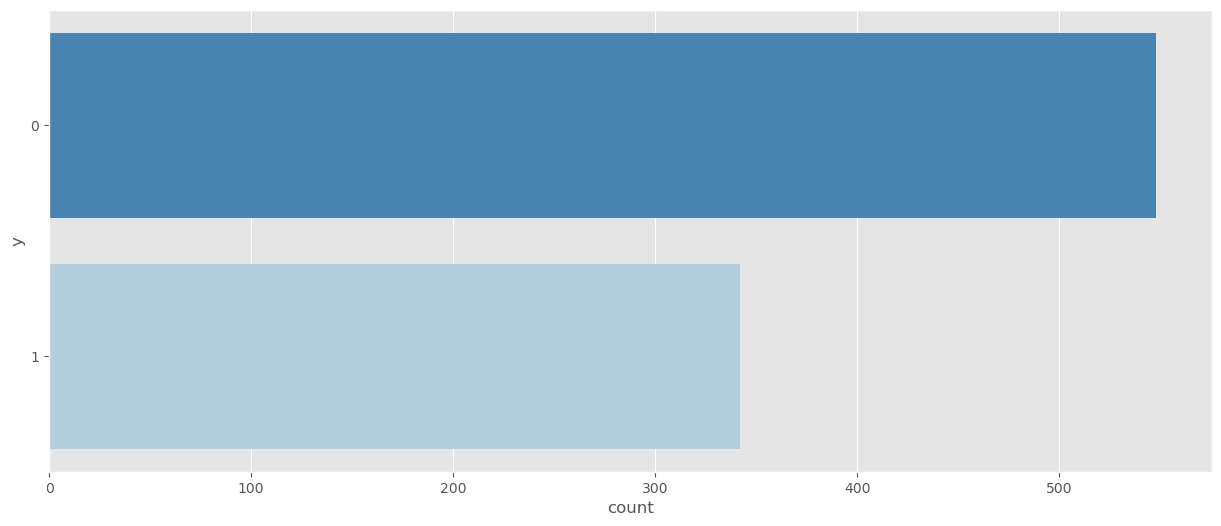

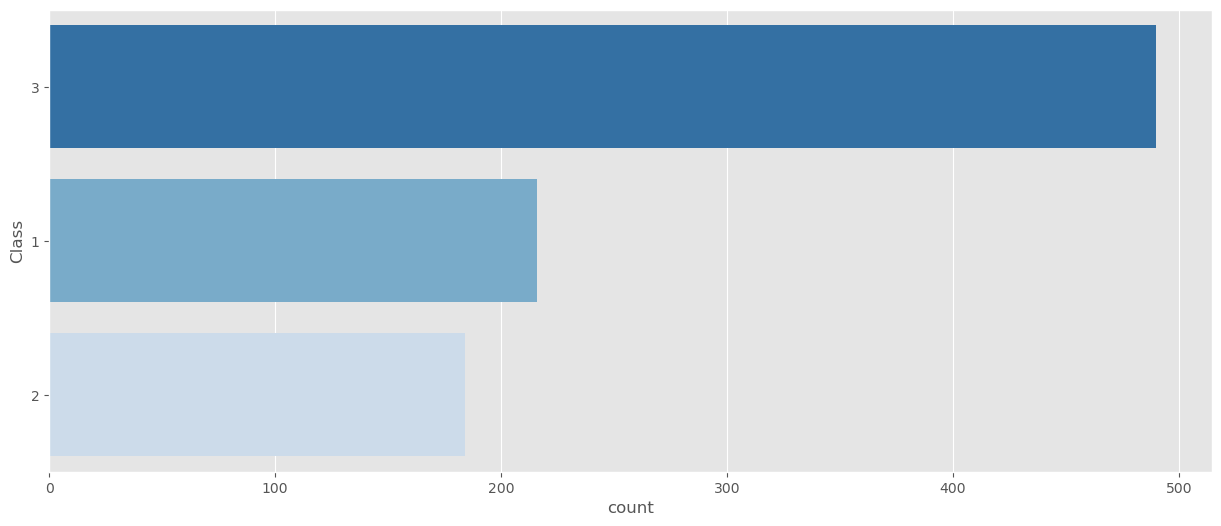

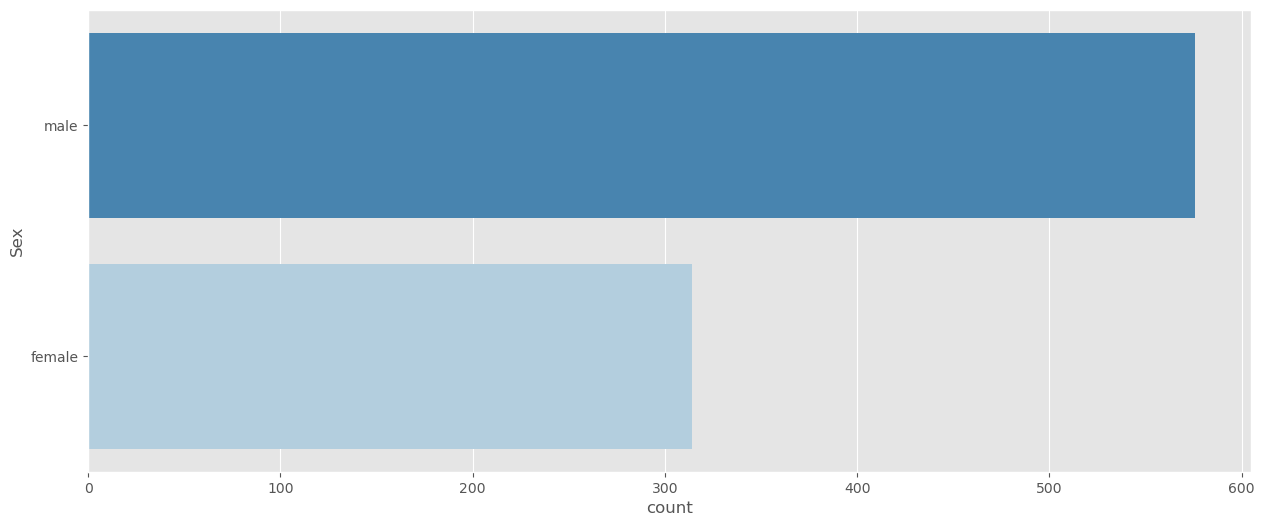

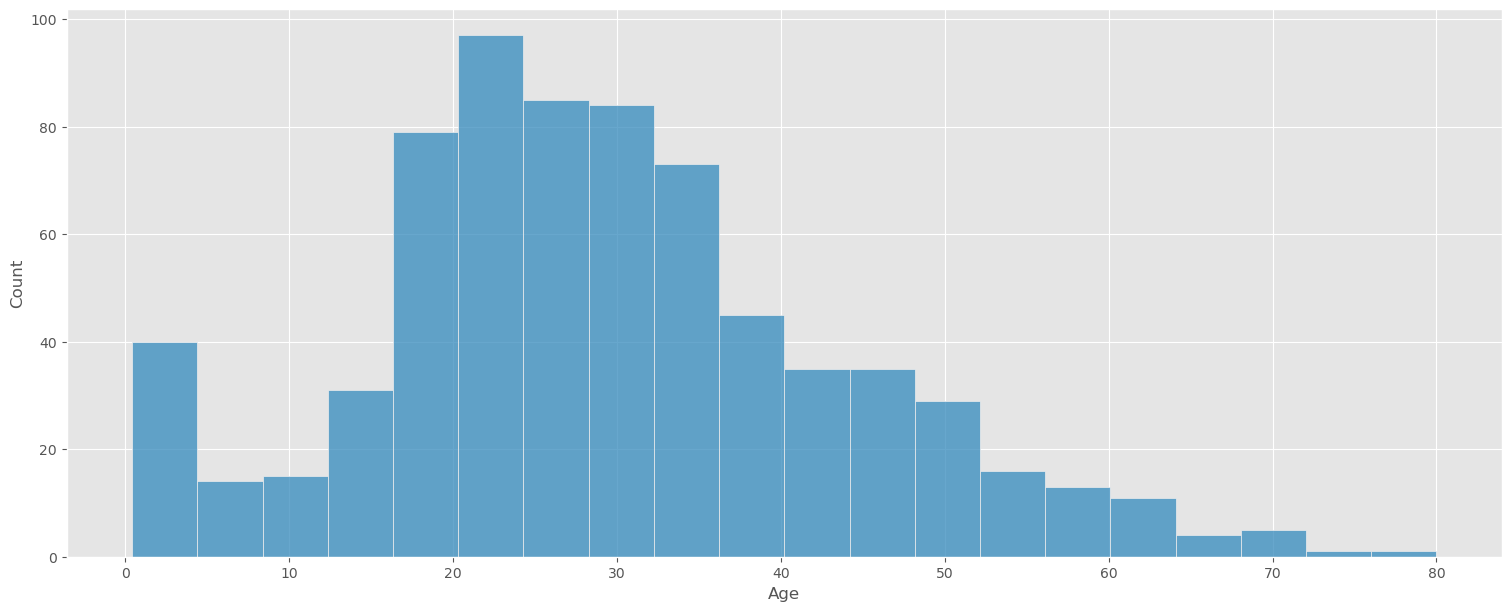

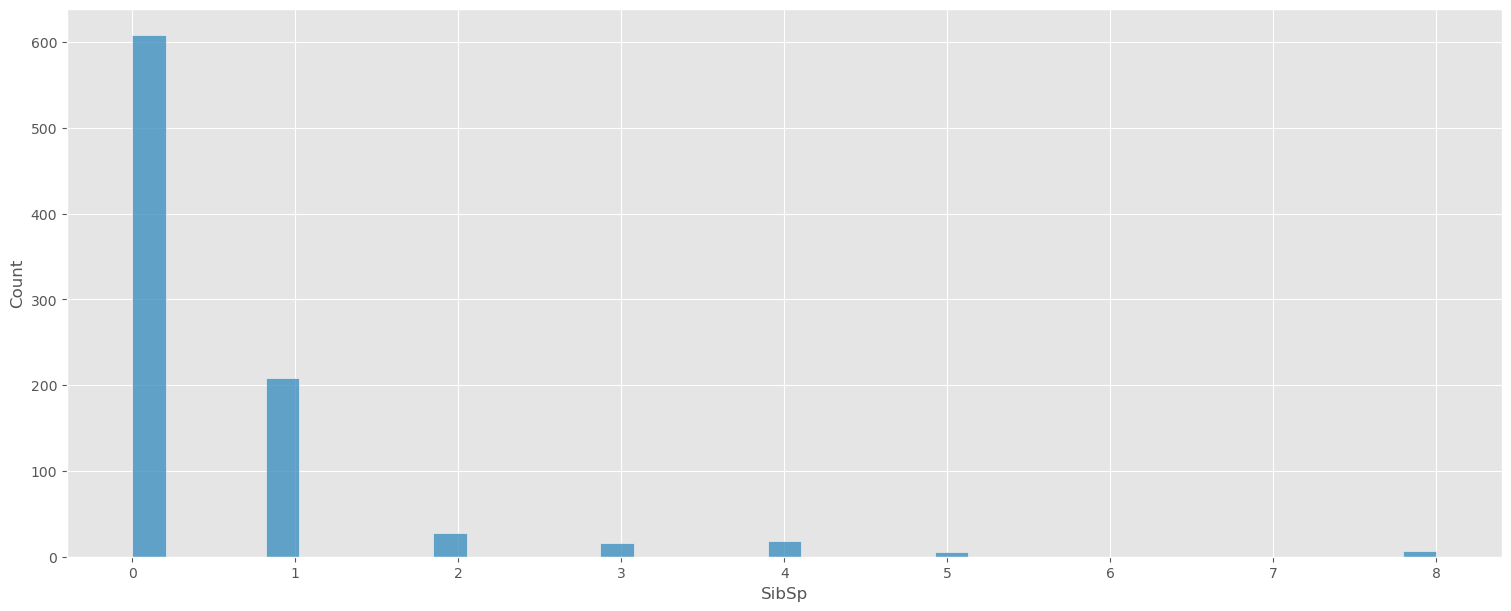

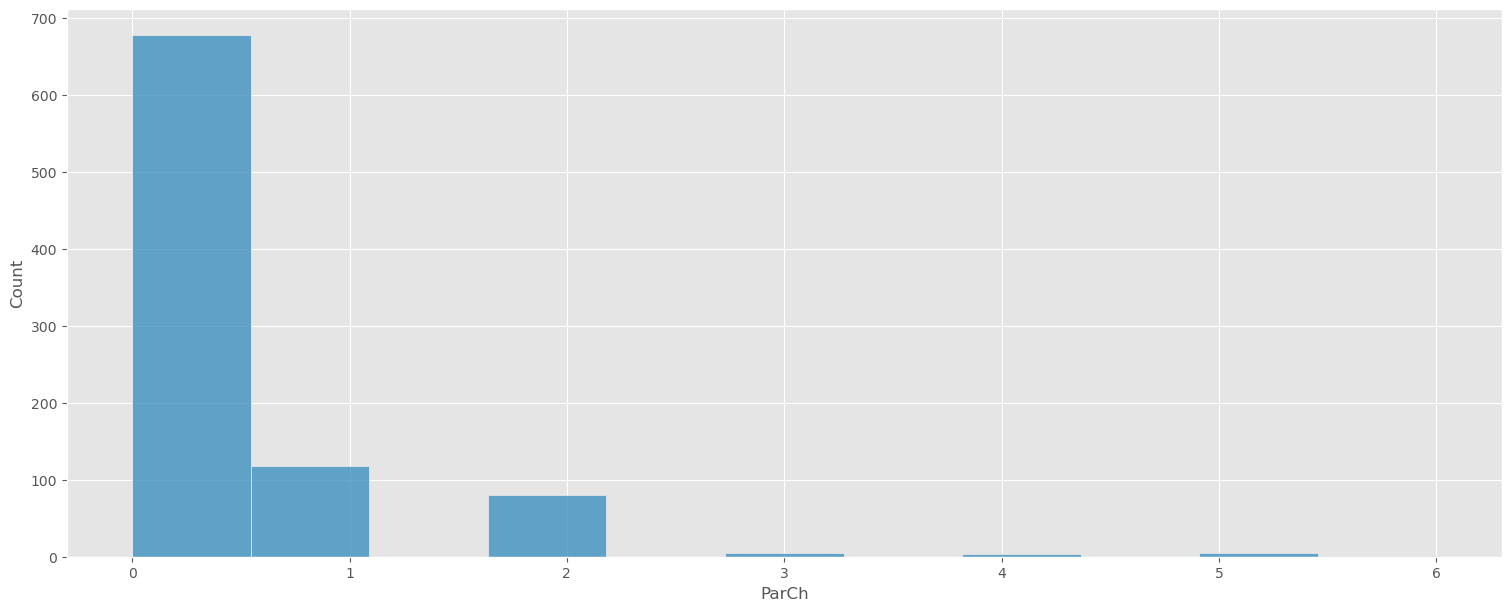

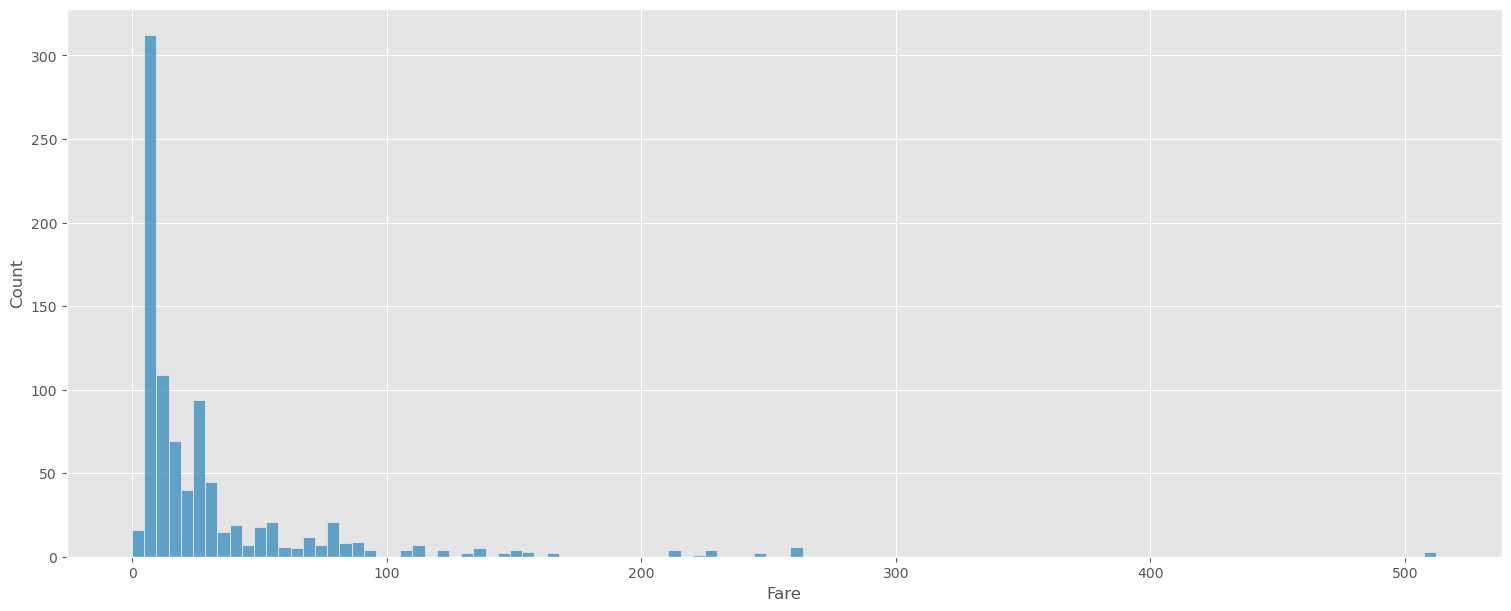

In [362]:
vis_val_counts(col)

Text(0, 0.5, 'Count')

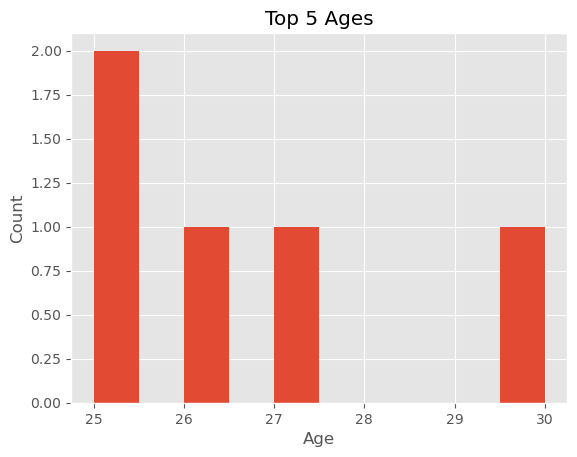

In [363]:
#Let's take a closer look at fare

ax = df['Age'].value_counts() \
    .head().plot(kind='hist', title='Top 5 Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

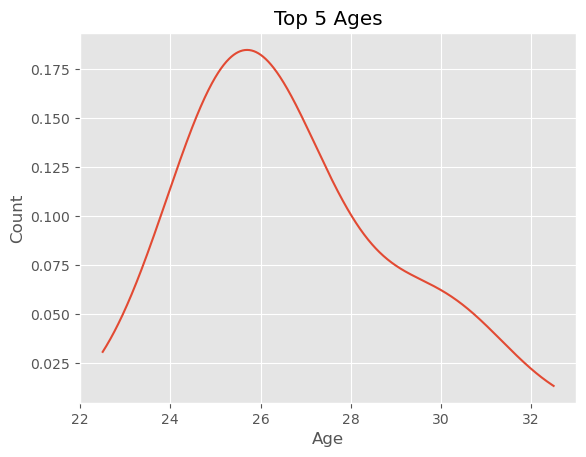

In [364]:
#Kde is good for comparison because normalised

ax = df['Age'].value_counts() \
    .head().plot(kind='kde', title='Top 5 Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [365]:
def vis_kde(col):
    cat=[]
    for i in col:
        if df[i].dtype != 'category':
            cat.append(i)
    for i in cat:
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.kdeplot(data=df, x=df[i])                    

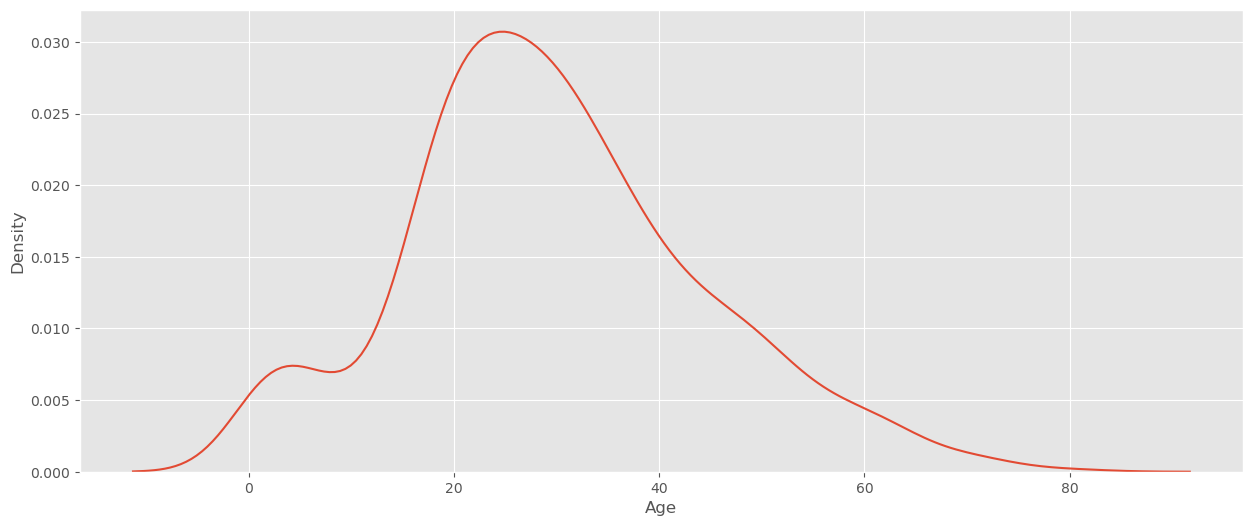

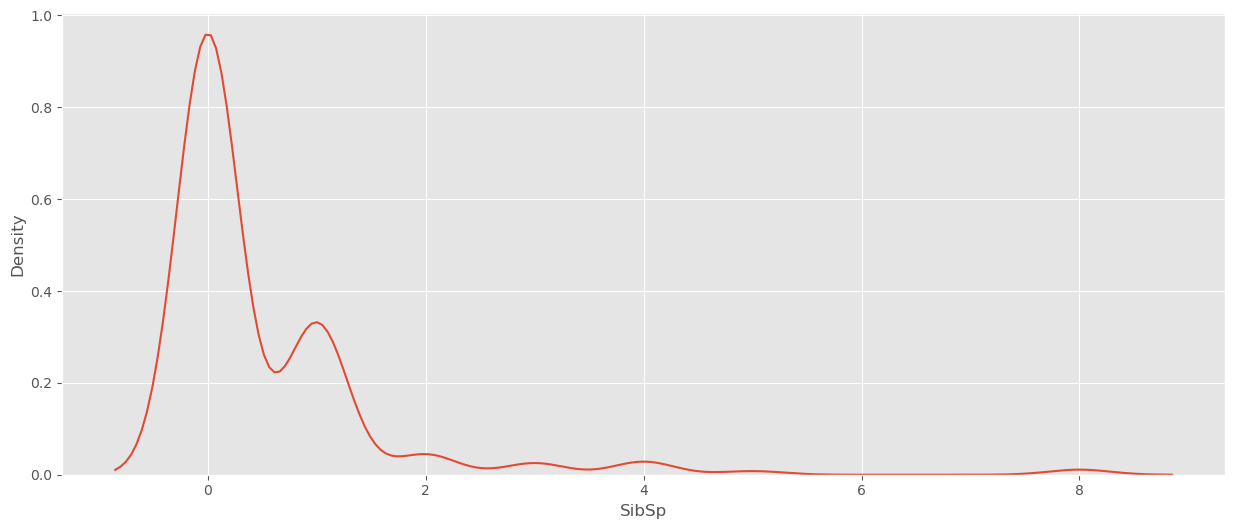

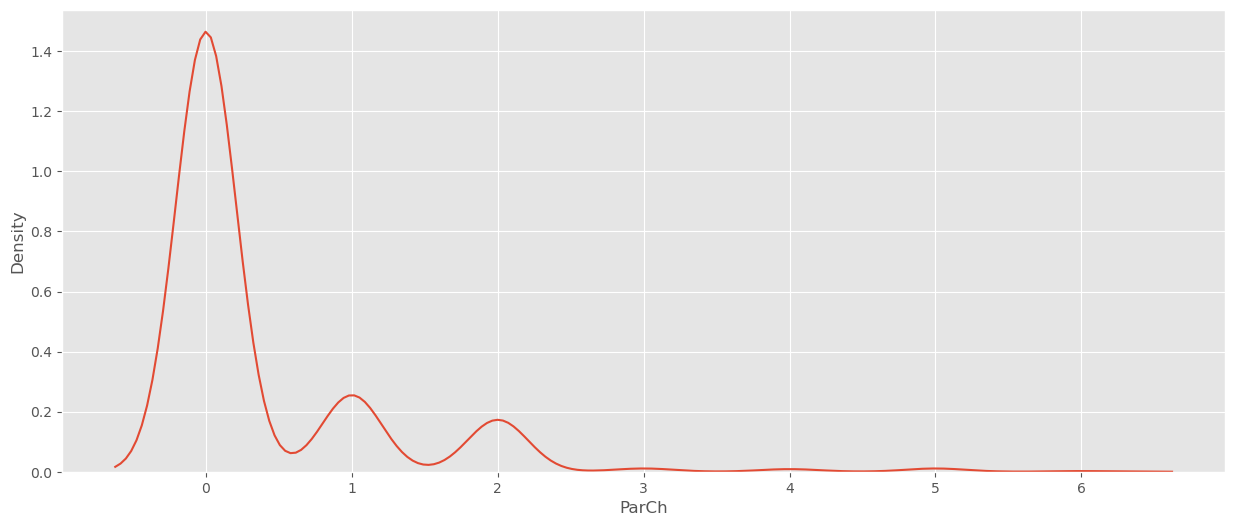

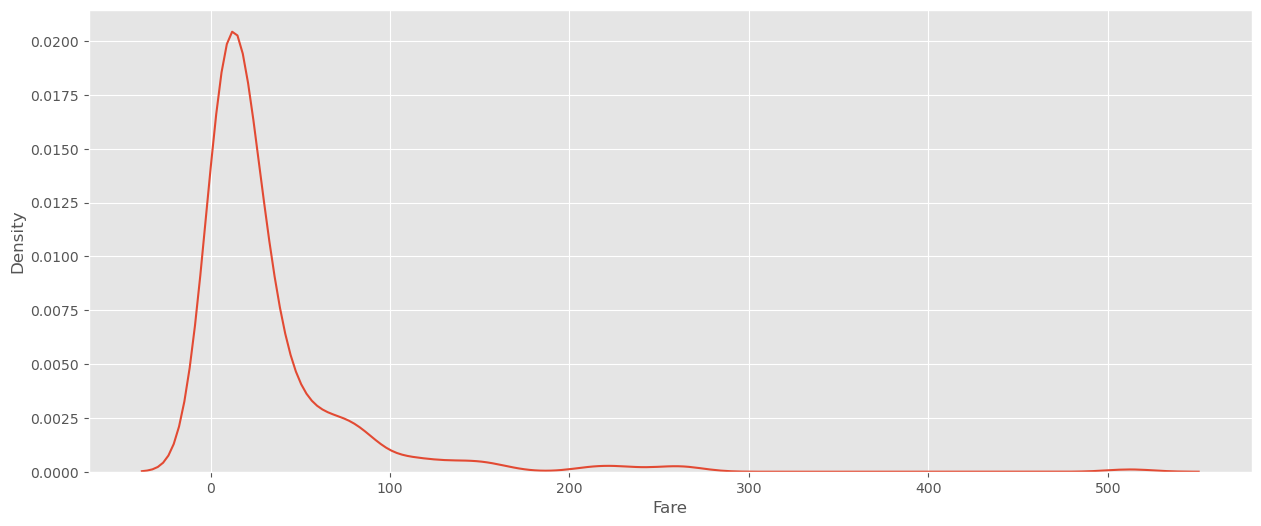

In [366]:
vis_kde(col)

PDF ... relationship between random variable and it's probability 

# Examining Feature Relationships

## Scatterplot

In [367]:
df.columns

Index(['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare'], dtype='object')

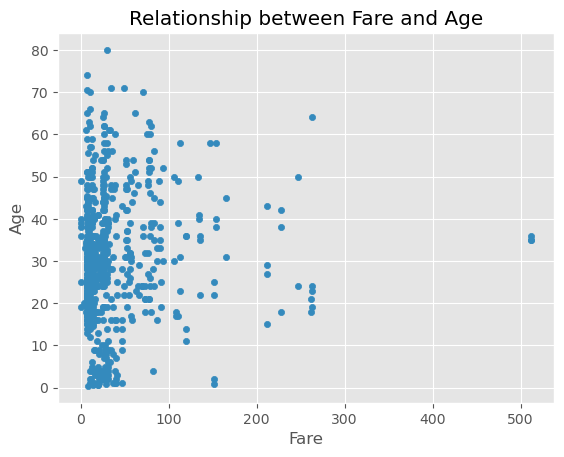

In [368]:
df.plot(kind='scatter',
       x='Fare',
       y='Age',
       title='Relationship between Fare and Age')

plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

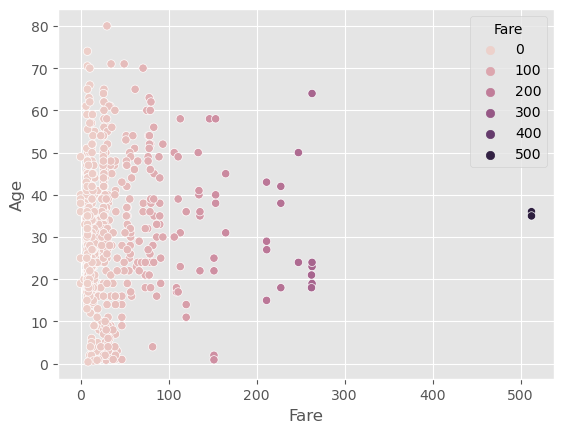

In [369]:
sns.scatterplot(x='Fare',
                y='Age',
                hue='Fare',
                data=df)

# Pairplot

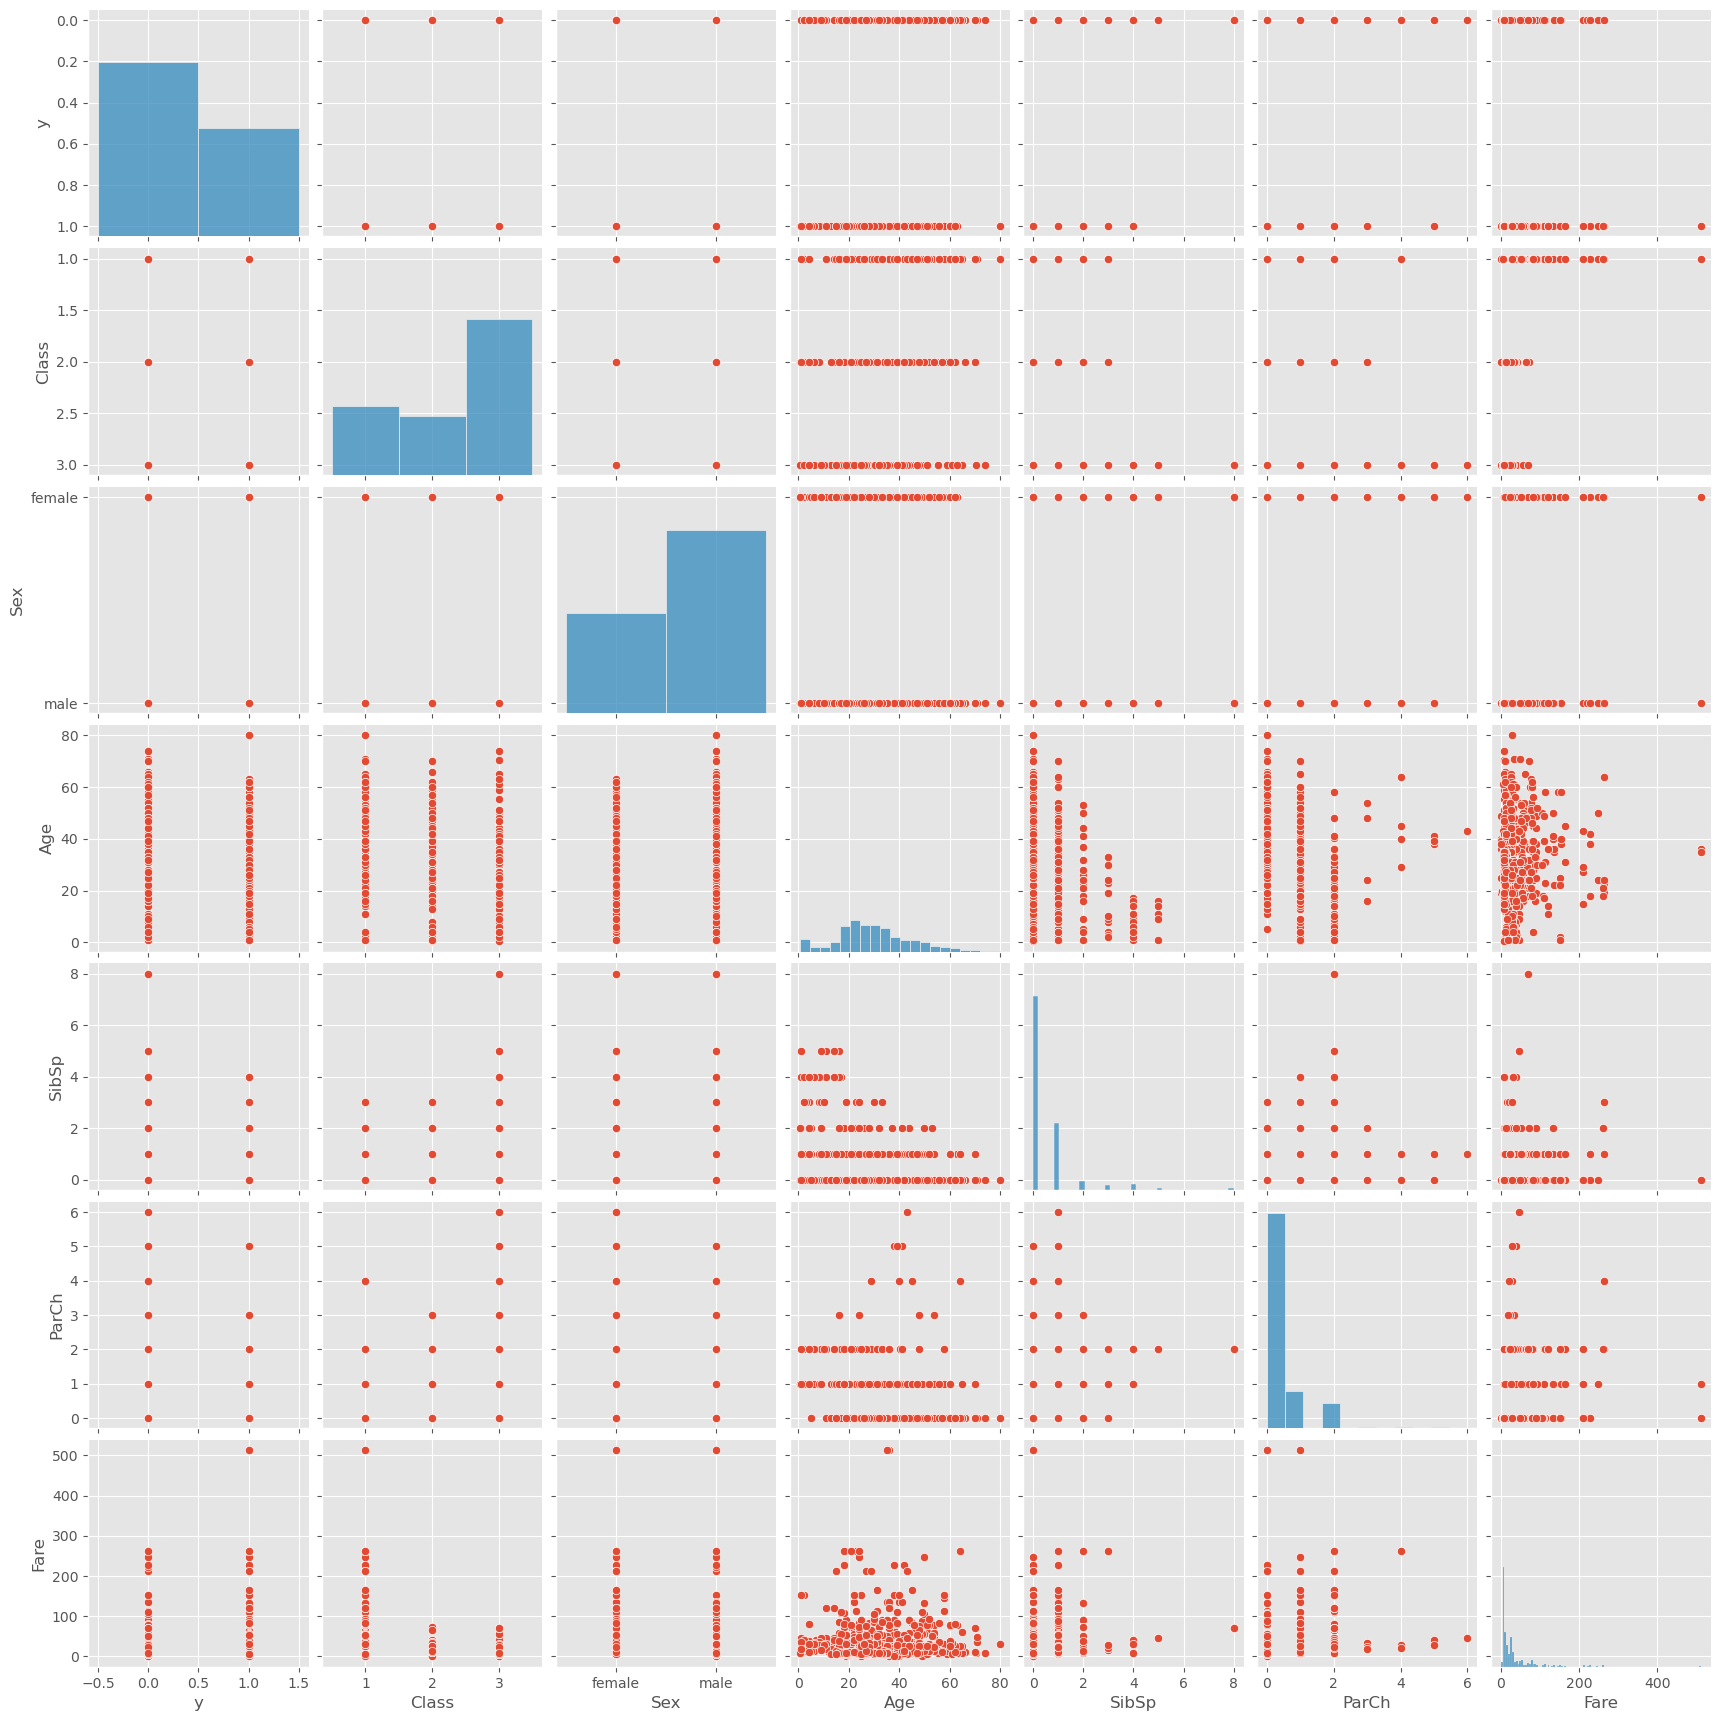

In [370]:
sns.pairplot(data=df, 
             vars=['y', 'Class', 'Sex', 'Age', 'SibSp', 
                   'ParCh', 'Fare'])

plt.show()

# Correlation Matrix

In [371]:
df.columns

Index(['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare'], dtype='object')

In [372]:
df_corr = df[['y', 'Class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare']].corr()

<AxesSubplot:>

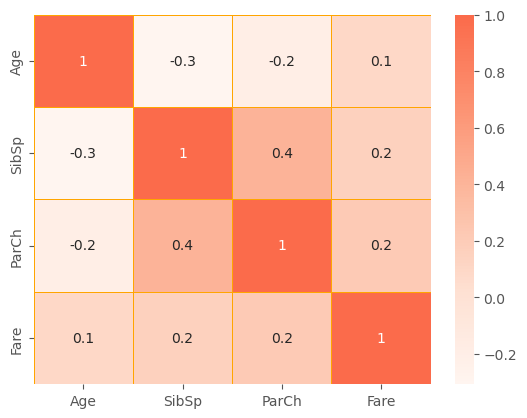

In [373]:
sns.heatmap(df_corr,
           fmt='.1g',
           linecolor='orange',
           linewidths=0.65,
           annot=True,
           center=True,
           cmap='Reds')

# Ask a question of the data

In [374]:
df.query("Fare == 0")

,y,Class,Sex,Age,SibSp,ParCh,Fare
179,0,3,male,36.0,0,0,0.0
263,0,1,male,40.0,0,0,0.0
271,1,3,male,25.0,0,0,0.0
277,0,2,male,NaN,0,0,0.0
302,0,3,male,19.0,0,0,0.0
413,0,2,male,NaN,0,0,0.0
466,0,2,male,NaN,0,0,0.0
481,0,2,male,NaN,0,0,0.0
597,0,3,male,49.0,0,0,0.0
633,0,1,male,NaN,0,0,0.0


I assume these are staff, is it necessary to impute age?

Other opportunities for feature engineering could include SibSp and ParCh

In [375]:
df.to_csv('df_post_eda.csv')